In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import sklearn
import scipy
import sklearn.datasets
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [258]:
alpha = 0.95

In [290]:
symbols = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
def color_generator():
    color = '#'
    for i in range(6):
        index = 0
        for j in xrange(1000) :
            index = random.randint(0, 15)
        color += (symbols[index])
    return color

3. Сгенерируйте выборку $X_1, ..., X_{100}$ из стандартного нормального распределения. По- стройте и визуализируйте точный доверительный интервал уровня доверия $\alpha$ = 0.95 для

(a) a при известном σ2,

(b) $σ^2$ при известном a,

(c) a при неизвестном $σ^2$,

(d) $σ^2$ при неизвестном a,

(e) доверительную область для (a, $σ^2$).

Сделайте выводы.

Берем такую центральную статистику $\frac{\sum{X_i} - an}{\sigma\sqrt n} \sim N(0, 1)$ Стандартное нормальное

Тогда $P(z_{\frac{1 - \alpha}{2}} < \frac{\sum{X_i} - an}{\sigma\sqrt n} < z_{\frac{1 + \alpha}{2}}) = \alpha$, где $z_{\alpha} - \alpha$ квантиль стандартного нормального распределения
Преобразуем данное тождество

$(\frac{\sum{X_{i}} - \sigma * \sqrt{n} * z_{\frac{1 + \alpha}{2}}}{n} < a < \frac{\sum{X_{i}} - \sigma * \sqrt{n} * z_{\frac{1 - \alpha}{2}}}{n} )$

In [102]:
def a_sigma_known(selection, alpha, sigma):
    summa = np.sum(selection)
    first_quantile = scipy.stats.norm.ppf((1. - alpha) / 2.)
    second_quantile = scipy.stats.norm.ppf((1. + alpha) / 2.)
    print first_quantile, second_quantile
    return ((summa - sigma * np.sqrt(len(selection)) * second_quantile) / float(len(selection)) ,\
            (summa - sigma * np.sqrt(len(selection)) * first_quantile) / float(len(selection)) )

ДЛя построения интервала для сигма квадрат при известном а делаем так: 
вычев матожидание получим нормальную с нулевым матожиданием, а нам надо сделать стандартную, т.е. поделим на кореньиз дисперсии. Получаем сумму n квадратов стандартных нормальных , а она распределена как $\chi^2$ с n степенями свободы

$\frac{1}{\sigma^2}\sum(X_i - a)^2 \sim \chi^2(n) \to P(\frac{1}{\sigma^2}\sum(X_i - a)^2 > z_{1 - \alpha}) = \alpha$, где $z_{1 - \alpha}$ -- квантиль уровня $(1 - \alpha)$ распределения хи-квадрат с $n$ степенями свободы

$P(0 < \sigma^2 < \frac{\sum(X_i - a)^2}{z_{1 - \alpha}}) = \alpha$ Получили тточный интервал

In [251]:
def sigma_a_known(selection, alpha, a):
    summa = np.sum((selection - a) ** 2)
    quantile = scipy.stats.chi2.ppf((1. - alpha), len(selection))
    print summa
    return ( 0   ,\
             (summa / (float(quantile))))  

Cледующие 2 пункта разбирались на лекции в качестве примера использования линейной регрессии при построении точных доверительных интервалов:

$
X_1 ... X_n \sim N(a, \sigma^2)$

$L = (a,a,a...a)^T$

$Z = (1,1,1...1)^T$

$\hat{\theta}  = (Z^T \cdot Z)^{-1} \cdot Z^T \cdot X = \overline{X}$
Тогда по следсвиям(использ в доверительных интервалах) из теоремы об ортоганальном разложении
<ul>
    <li>$P(0 < \sigma^2 < \frac{n S^2}{z_{1 - \alpha}}) = \alpha$, где $z_{1 - \alpha}$ - квантиль $\chi^2$ распределения с n - 1 степенью свободы</li>
    <li>$P(\overline{X} - \sqrt{\frac{S^2}{n - 1}} * z_{\frac{1 + \alpha}{2}} < a < \overline{X} + \sqrt{\frac{S^2}{n - 1}} * z_{\frac{1 + \alpha}{2}}) = \alpha$, где $z_{\alpha}$ - квантиль распределения Стьюдента с n - 1 степенью свободы</li>
</ul>

a , когда $\sigma$ не известно

In [269]:
def a_sigma_unknown(selection, alpha):
    mean = selection.mean()
    selection_variance = (selection ** 2).mean() - selection.mean()
    quantile = scipy.stats.t.ppf((1. + alpha) / 2., len(selection) - 1)
    return ( (mean - np.sqrt(selection_variance / float(len(selection) - 1)) *  quantile)  ,\
             (mean + np.sqrt(selection_variance / float(len(selection) - 1)) *  quantile)   )

In [270]:
def sigma_a_unknown(selection, alpha):
    selection_variance = (selection ** 2).mean() - selection.mean()
    quantile = scipy.stats.chi2.ppf(1. - alpha, len(selection) - 1)
    return ( 0 ,\
           (len(selection) * selection_variance) / float(quantile))

In [7]:
def normal_region():
    

IndentationError: expected an indented block (<ipython-input-7-4ccc7be219c4>, line 2)

# DRAWER

In [281]:
def eval_interval(distribution, confidence_level, interval_function, parameter = np.inf):
    sample = distribution.rvs(size=100)
    if parameter != np.inf:
        ans =  interval_function(sample, confidence_level, parameter)
    else:
        ans =  interval_function(sample, confidence_level)
    return ans

In [308]:
first = eval_interval(scipy.stats.norm(), alpha, a_sigma_known, 1)
first

-1.95996398454 1.95996398454


(-0.24301943185699859, 0.14897336505101219)

In [309]:
second = eval_interval(scipy.stats.norm(), alpha, sigma_a_known, 0)
second

83.0841537891


(0, 1.0783661178841504)

In [310]:
third = eval_interval(scipy.stats.norm(), alpha, a_sigma_unknown)
third

(-0.28855182213472264, 0.10380711870216636)

In [311]:
fourth = eval_interval(scipy.stats.norm(), alpha, sigma_a_unknown)
fourth

(0, 1.7076493146749459)

Real a = 0, sigma^2 = 1

In [323]:
a = np.linspace(first[0], first[1], 1000)
b = np.linspace(second[0], second[1], 1000)
c = np.linspace(third[0], third[1], 1000)
d = np.linspace(fourth[0], fourth[1], 1000)

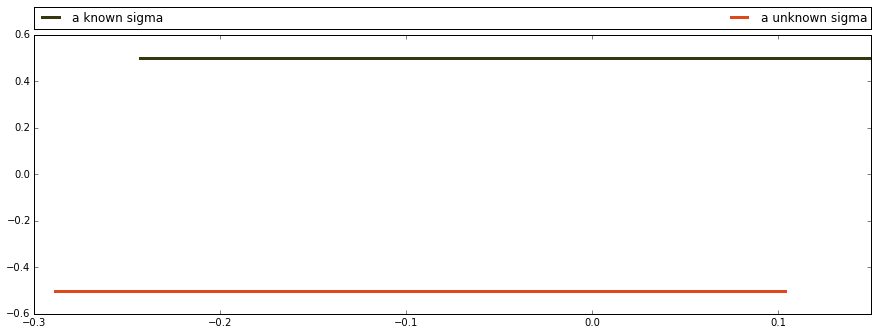

In [325]:
plt.figure(figsize=(15,5))
plt.plot(a, [0.5] * len(a), color=color_generator(), linewidth = 3, label = 'a known sigma')
plt.plot(c, [-0.5] * len(c), color=color_generator(), linewidth = 3, label = 'a unknown sigma')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.show()

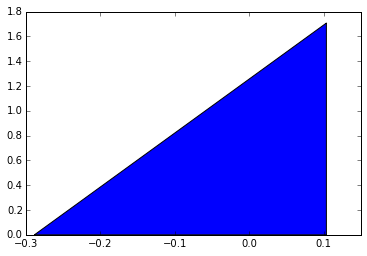

In [327]:
plt.fill_between(c,d)